In [5]:
from sklearn.svm import LinearSVC
from art.utils import load_dataset
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from art.attacks.evasion import ProjectedGradientDescent
from art.estimators.classification.scikitlearn import ScikitlearnSVC
from art.estimators.classification import KerasClassifier
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.experimental.output_all_intermediates(True)

In [6]:
# X, y = load_digits(return_X_y=True)
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)
(X_train, y_train), (X_test, y_test), min_, max_ = load_dataset("mnist")
# model = LinearSVC(max_iter=10)
# model.fit(X_train.reshape(len(np.argmax(y_train, axis=1)), 784), np.argmax(y_train, axis=1))
# clf = ScikitlearnSVC(model=model, clip_values=(min_, max_))

from keras.models import load_model
path = "./mnist/model.h5"
model = load_model(path)
clf = KerasClassifier(model=model, use_logits=False, clip_values=(min_, max_))
attack_size = 1
attack = ProjectedGradientDescent(clf, eps=0.3, batch_size = attack_size)
X_test_adv = attack.generate(X_test[:attack_size])


2023-05-09 21:15:08.103647: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-05-09 21:15:08.514588: W tensorflow/c/c_api.cc:300] Operation '{name:'batch_normalization_7_1/beta/Assign' id:3377 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_7_1/beta/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_7_1/beta, batch_normalization_7_1/beta/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-05-09 21:15:10.680681: W tensorflow/c/c_api.cc:300] Operation '{name:'batch_normalization_17_1/beta/momentum/Assign' id:5360 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_17_1/beta/momentum/Assign}} = AssignVariableOp[_has_manual_control_d

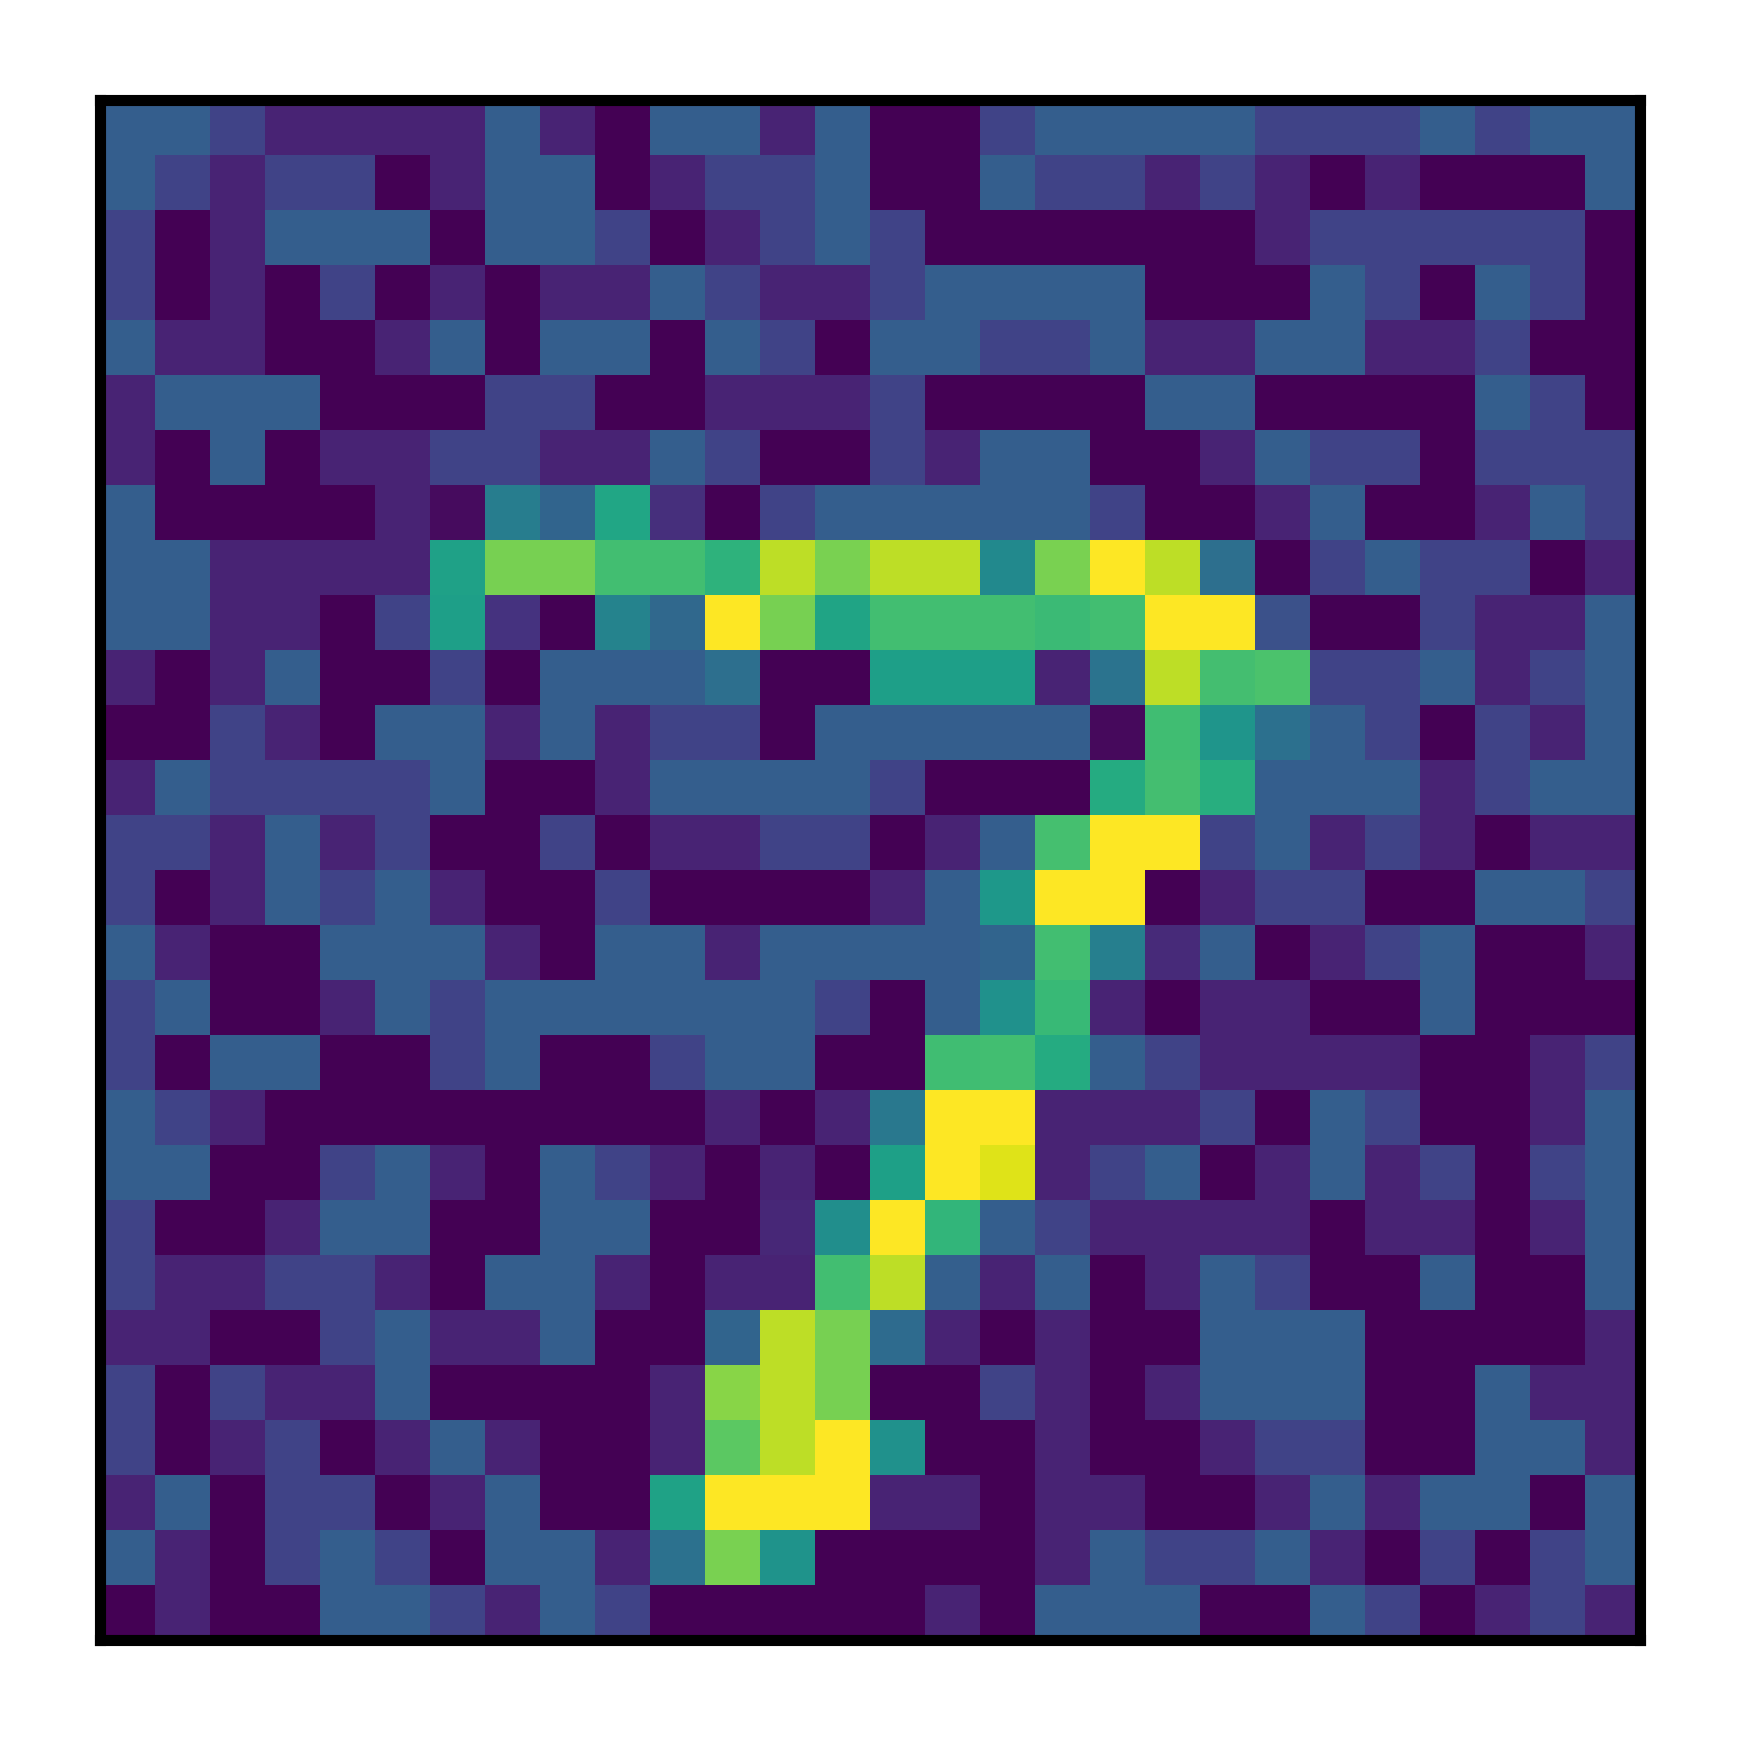

In [7]:
X_test_adv = X_test_adv[0].reshape(1, 28, 28)
fig, ax = plt.subplots(1, 1)
plot = ax.imshow(X_test_adv[0])
plot.axes.set_xticks([])
plot.axes.set_yticks([])
fig.set_size_inches(2, 2)
fig.set_dpi(1000)
# fig.tight_layout()
fig.savefig(f"noisy_number.eps", format="eps", dpi=1000)

In [ ]:
!python generate.py
!python plot.py

2023-05-09 21:04:12.884376: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-09 21:04:12.941943: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 21:04:13.945464: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-09 21:04:20.069139: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at htt